# Projeto 1 - Ciência dos Dados

Nome: Alice Longman

Nome: Lorena Budin

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1056]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import emoji

In [1057]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Administrador\P1CDADOS\P1-cdados


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [1058]:
filename = 'shein.xlsx'

In [1059]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,Classificação
0,eu tô completamente apaixonada pelas lingeries...,1
1,minhas compras da shein não saem de curitiba n...,3
2,"que demora pra essas roupas da shein chegar, q...",3
3,“ainn a shein copiou minha marca buaaa” fia su...,0
4,eu to com abstinência de comprar coisa na shei...,0


___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

- SHEIN é uma marca que gera recursos a política do FastFashion e concentra seus produtos na categoria de roupas, acessórios e sapatos femininos. Classificamos como relevante os comentários negativos da marca, pois acreditamos que é de extrema importância aperfeiçoarmos as dores e necessidades dos consumidores.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

- PROPOSTAS PARA OUTRAS LIMPEZAS/TRANSFORMAÇÕES: Removemos os nomes dos usuários que foram mencionados ou citados nos tweets, pois isso não afetaria o conteúdo da base de dados.

In [1060]:
import re 


def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    #import string
    punctuation = '[!-.:?;""''“”''/_"\n"(),_%$\|/,<>]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    
    
    
    filtropessoas = filter(lambda x:x[0]!='@', text_subbed.split())
    juncao = " ".join(filter(lambda x:x[0]!='@', text_subbed.split()))
    return juncao

In [1061]:
treinamento= pd.Series(train.Treinamento)
treinamento

0      eu tô completamente apaixonada pelas lingeries...
1      minhas compras da shein não saem de curitiba n...
2      que demora pra essas roupas da shein chegar, q...
3      “ainn a shein copiou minha marca buaaa” fia su...
4      eu to com abstinência de comprar coisa na shei...
                             ...                        
295    @sugarv3nus eu vi umas na shein coisa mais esq...
296    fiz ontem a primeira compra na shein, só esper...
297            so mandei vir 1 cena da shein e não curti
298         trabalhar pra comprar minhas coisas na shein
299         comprei umas roupinhas na shein, fiquei feia
Name: Treinamento, Length: 300, dtype: object

In [1062]:
cleanup(treinamento[0])

'eu tô completamente apaixonada pelas lingeries da shein'

## CLASSIFICADOR 0

In [1063]:
filtro0= train["Classificação"]== 0
classificador0= ' '.join(train.loc[filtro0, 'Treinamento'])

In [1064]:
classificador0limpo= cleanup(classificador0)
classificador0limpo 

'ainn a shein copiou minha marca buaaa fia sua marca também copia marcas menores eu to com abstinência de comprar coisa na shein nem faz sentido eu comprar pq além de pobre não tem pra onde usar mas eu sinto muita faltaaaa parabens consumismo vc venceu vc sabe que venceu httpstcoppqyrq1nq2 pessoas que usam shein alguém tem a carta s eu posso dar hn e tenho outras contas que posso dar também o e e o i kkk shein cartõesshein sheinminijogo sheinminigame httpstcovlurrnewud acabei as atividades agr vou ver roupa na shein tem umas mt monstrahttpstcosntqx4dbf4 fiz duas compras na shein ontem e já quero agora na minha casa tô a hrsss vendo a parte de decoração pra casa da shein será se a vida adulta chegou kkkkk rt odeio quem fala mal da shein se voce fala mal da shein saia da minha casa comprei na shein tb graças a deus o aliexpress nunca me pegou meu fetiche ultimamente tem sido colocar roupas no carrinho na shein e esquecer lá vontade de gastar meu salário todo na shein eu até tento juntar 

## CLASSIFICADOR 1

In [1065]:
filtro1= train["Classificação"] == 1
classificador1= ' '.join(train.loc[filtro1, 'Treinamento'])

In [1066]:
classificador1limpo= cleanup(classificador1)
classificador1limpo

'eu tô completamente apaixonada pelas lingeries da shein minhas primeiras compras na shein e eu tô apaixonada httpstcohxxrz0ss1j minha compra da shein finalmente chegou no br gente por favor z os cílios da shein são extremamente leves macios com a base super molinha e mt fácil de colocar meudeus socorro comprei um biquíni babadeira na shein por 60 merréis minhas compras shein chegaram hoje sto me sentindo adorave compra minha lista de desejo da shein linda aii a minha encomenda da shein chegou🥰🤩 os colares que eu comprei no shein chegaram agorinha e ainda chegaram mais cedo q o previsto shein eu te amo ansiosa pra minha mãe chegar com meus pedidos da shein 🥰 na shein tem umas lindas demais e chega em 15 dias sério é de chorar de tao lindas mais uma compra da shein sem ser taxada httpstcobxopdk81zr wtf a minha encomenda da shein veio b rápido rt apaixonada nas coisas da shein preciso ser rica pra comprar tudo rt nunca vi anéis que me assentassem tão bem como os da shein 😻 shein nunca me

## CLASSIFICADOR 2

In [1067]:
filtro2= train["Classificação"] == 2
classificador2= ' '.join(train.loc[filtro2, 'Treinamento'])

In [1068]:
classificador2limpo= cleanup(classificador2)
classificador2limpo

'lança o desconto 80 ou morte minhas roupas da shein não chegam nunk 10 dias e minha encomenda da shein ainda nem chegou no brasil queria comprar uma bolsinha na shein mas sla não tenho confiança no site bolada com a shein eu vou só colocando um monte de coisas no meu carrinho da shopee e da shein mas nunca compro kkkkk as encomendas da shein demoram muito a chegar não gostei da minha roupa da shein eu agorinha na shein 🤡🤡 me dá odio de saber q eu comprei um desse na shein e ficou horrível em mim kkkkkkkkkkk httpstcoo8dqc4ksjd as avaliações da shein eu morro httpstcobv7tggjvhp impossível alguém ter visto o site da shein do início ao fim gente não tem um feedback bom essa roupa da shein véi meu sonho pior q fast fashion a modelo smp usa p e não tem nem foto de cliente q nem na shein vc compra e se fode vo compra da shein hj ctz q vo sair da depressão tava tentando achar aquele anel do cal com a pedra preta na shein achei um parecido mas tenho medo de ser mt ruim 80 reais em um ovo de pá

## CLASSIFICADOR 3

In [1069]:
filtro3= train["Classificação"] == 3
classificador3= ' '.join(train.loc[filtro3, 'Treinamento'])

In [1070]:
classificador3limpo= cleanup(classificador3)
classificador3limpo

'minhas compras da shein não saem de curitiba nunca que demora pra essas roupas da shein chegar que saco ay caras o fim de uma era minhas compras da shein foram taxadas httpstcohdyoasci5a comprei na shein maquiagem uma vez e depois descobri que a produção dele é 100 escrava me arrependo até hoje eu deveria ter imagino por eles serem uma marca de fast fashion o que em si não é algo para se orgulhar uma coisa que me arrependo é comprar roupas na shein a qualidade dos tecidos é tao ruim que chega a dar dó e também porque descobri que todos irritam minha pele comprei roupa ontem na shein e ainda nao chegou 😕 loja toxica do crl ia comprar um vestido na shein porém está esgotado 🥺 tô triste doida para receber a encomenda da shein que eu fui taxada paguei taxa pra porra das minhas coisas da shein e nunca mais chegou q ódio shein tem que parar de roubar as marcar pequenas a shein o que me mata são os valores dos fretes e quando eles copiam oq alguém postou e colocan como se fosse eles mesmos 😐

## Dividindo

In [1071]:
from nltk.tokenize.casual import TweetTokenizer
t = TweetTokenizer()
cla0limposepa= t.tokenize(classificador0limpo)

In [1072]:
cla1limposepa= t.tokenize(classificador1limpo)

In [1073]:
cla2limposepa= t.tokenize(classificador2limpo)

In [1074]:
cla3limposepa= t.tokenize(classificador3limpo)

## CLASSIFICADOR NAIVE BAYES

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [1075]:
total = cla1limposepa + cla0limposepa + cla2limposepa + cla3limposepa
print (train['Classificação'])

0      1
1      3
2      3
3      0
4      0
      ..
295    2
296    1
297    2
298    0
299    2
Name: Classificação, Length: 300, dtype: int64


In [1076]:
train['Classificação'] = train['Classificação'].astype('category')
train['Classificação'].cat.categories = ['Muito Irrelevante','Irrelevante', 'Relevante', 'Muito Relevante']

In [1077]:
print(train['Classificação'])

0            Irrelevante
1        Muito Relevante
2        Muito Relevante
3      Muito Irrelevante
4      Muito Irrelevante
             ...        
295            Relevante
296          Irrelevante
297            Relevante
298    Muito Irrelevante
299            Relevante
Name: Classificação, Length: 300, dtype: category
Categories (4, object): ['Muito Irrelevante', 'Irrelevante', 'Relevante', 'Muito Relevante']


In [1078]:
# 0 - MI -> comentarios aleatórios mas positivos
# 1 - I -> falando bem
# 2 - R -> falando mal
# 3 - MR -> falando mal de algo específico da marca

In [1079]:
classificacaorelevante= train['Classificação'] == 'Relevante'
classificacaorelevante = train.loc[classificacaorelevante,['Treinamento']].copy()
#classificacaorelevante

In [1080]:
classificacaoirrelevante= train['Classificação'] == 'Irrelevante'
classificacaoirrelevante = train.loc[classificacaoirrelevante,['Treinamento']].copy()
#classificacaoirrelevante

In [1081]:
classificacaomuitoirrelevante= train['Classificação'] == 'Muito Irrelevante'
classificacaomuitoirrelevante = train.loc[classificacaomuitoirrelevante,['Treinamento']].copy()
#classificacaoirrelevante

In [1082]:
classificacaomuitorelevante= train['Classificação'] == 'Muito Relevante'
classificacaomuitorelevante = train.loc[classificacaomuitorelevante,['Treinamento']].copy()
#classificacaoirrelevante

## FÓRMULA

$\quad P(R|palavra) = \frac{P(palavra|R)P(R)}{P(palavra)}$

e que:

$\quad P(IR|palavra) = \frac{P(palavra|IR)P(IR)}{P(palavra)}$


In [1083]:
#Probabilidade de uma palavra ser muito irrelevante
p_mi=len(cla0limposepa)/len(total)
p_mi

0.3534503486415004

In [1084]:
#Probabilidade de uma palavra ser irrelevante
p_i= len(cla1limposepa)/len(total)
p_i

0.1709545563837461

In [1085]:
#Probabilidade de uma palavra ser relevante
p_r= len(cla2limposepa)/len(total)
p_r

0.24765568646309208

In [1086]:
#Probabilidade de uma palavra ser muito relevante
p_mr= len(cla3limposepa)/len(total)
p_mr

0.22793940851166145

## Frequências Relativas e Absolutas

In [1087]:
#Frequencias relativas e absolutas da palavras dentro do grupo muito irrelevante
series0= pd.Series(cla0limposepa)
freqab0= series0.value_counts()
freqrel0= series0.value_counts(normalize=True)

In [1088]:
#Frequencias relativas e absolutas da palavras dentro do grupo irrelevante
series1 = pd.Series(cla1limposepa)
freqab1= series1.value_counts()
freqrel1= series1.value_counts(normalize=True)

In [1089]:
#Frequencias relativas e absolutas da palavras dentro do grupo relevante
series2 = pd.Series(cla2limposepa)
freqab2= series2.value_counts()
freqrel2= series2.value_counts(normalize=True)

In [1090]:
#Frequencias relativas e absolutas da palavras dentro do grupo muito relevante
series3 = pd.Series(cla3limposepa)
freqab3= series3.value_counts()
freqrel3= series3.value_counts(normalize=True)

## Classificando

In [1091]:
def classifica (frase):
    
    p_mi = 0.3534503486415004
    p_i = 0.1709545563837461
    p_r = 0.24765568646309208
    p_mr = 0.22793940851166145
    prob_frase_dado_MI= 1
    prob_frase_dado_I= 1
    prob_frase_dado_R= 1
    prob_frase_dado_MR= 1
    total_palavras= 1000
    beta= 1
    
    frase= frase.split(' ')
    for palavra in frase:
        
        #probabilidade da frase ser muito irrelevante
        if palavra in freqab0:
            prob_frase_dado_MI *= ((freqab0[palavra]+beta)/(total_palavras+freqab0.sum()))
                                  
        if palavra not in freqab0:
             prob_frase_dado_MI *= (beta/(total_palavras+freqab0.sum()))
        
        #probabilidade da frase ser irrelevante
        if palavra in freqab1:
            prob_frase_dado_I *= ((freqab1[palavra]+beta)/(total_palavras+freqab1.sum()))
        
        if palavra not in freqab1:
            prob_frase_dado_I *= (beta/(total_palavras+freqab1.sum()))
        
        #probabilidade da frase ser relevante
        if palavra in freqab2:
            prob_frase_dado_R *= ((freqab2[palavra]+beta)/(total_palavras+freqab2.sum()))
        
        if palavra not in freqab2:
            prob_frase_dado_R *= (beta/(total_palavras+freqab2.sum()))
        
        #probabilidade da frase ser muito relevante
        if palavra in freqab3:
            prob_frase_dado_MR *= ((freqab3[palavra]+beta)/(total_palavras+freqab3.sum()))
        
        if palavra not in freqab3:
            prob_frase_dado_MR *= (beta/(total_palavras+freqab3.sum()))
                                   
    probMI_dado_frase = p_mi*prob_frase_dado_MI
    probI_dado_frase = p_i*prob_frase_dado_I
    probR_dado_frase = p_r*prob_frase_dado_R
    probMR_dado_frase = p_mr*prob_frase_dado_MR
    probabilidades = [probMI_dado_frase, probI_dado_frase, probR_dado_frase, probMR_dado_frase]
    
    if max(probabilidades) == probabilidades[0]: 
        return 'Muito Irrelevante'
    if max(probabilidades) == probabilidades[1]:
        return 'Irrelevante'
    if max(probabilidades) == probabilidades[2]: 
        return 'Relevante'
    if max(probabilidades) == probabilidades[3]:
        return 'Muito Relevante'

In [1092]:
#print(classifica(""))

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste



#### Classificação dos Tweets da planilha de Treinamento

In [1093]:
train['Classificador'] = train['Treinamento'].apply(classifica)

In [1094]:
tabela = pd.crosstab(train['Classificação'], train['Classificador'], normalize='all').round(3)
tabela

Classificador,Irrelevante,Muito Irrelevante,Muito Relevante,Relevante
Classificação,,,,
Muito Irrelevante,0.007,0.307,0.01,0.003
Irrelevante,0.183,0.023,0.00,0.007
Relevante,0.003,0.007,0.01,0.240
Muito Relevante,0.003,0.003,0.19,0.003


In [1095]:
tabelaporindex = pd.crosstab(train['Classificação'], train['Classificador'], normalize='index').round(3)
tabelaporindex

Classificador,Irrelevante,Muito Irrelevante,Muito Relevante,Relevante
Classificação,,,,
Muito Irrelevante,0.020,0.939,0.031,0.010
Irrelevante,0.859,0.109,0.000,0.031
Relevante,0.013,0.026,0.038,0.923
Muito Relevante,0.017,0.017,0.950,0.017


In [1096]:
#porcentagem de acertos do classificador
porcentagem = (tabela.iloc[0,1] + tabela.iloc[1,0] + tabela.iloc[2,3] + tabela.iloc[3,2])*100
f'{porcentagem.round(2)}%'

'92.0%'

In [1097]:
#porcentagem de erro na planilha Treinamento


## Verificando a performance do nosso classificador na planilha de Teste

In [1098]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test['Teste'] = test['Teste'].astype('str')
test['Teste'] = test['Teste'].apply(cleanup)
 
test

,Teste,Classificação
0,que era ruim as roupas da shein,2
1,só mil reais pra pagar o meu carrinho na shein...,1
2,faz cinco dias que minha compra da shein saiu ...,3
3,fiz uma compra na shein mas tô achando que foi...,3
4,paga o meu carrinho de compras na shein e eu f...,0
...,...,...
195,eu sou doida pra comprar na shein mas fico com...,2
196,amor como funciona o rastreamento na shein to ...,2
197,inclusive to pra comprar na shein e toda vida ...,3
198,shein sua vagabunda cade minhas coisaaas,2


In [1099]:
test['Classificação'] = test['Classificação'].astype('category')
test['Classificação'].cat.categories = ['Muito Irrelevante','Irrelevante', 'Relevante', 'Muito Relevante']

In [1100]:
test['Classificador'] = test['Teste'].apply(classifica)

In [1101]:
tabela2 = pd.crosstab(test['Classificação'], test['Classificador'], normalize='all')
tabela2

Classificador,Irrelevante,Muito Irrelevante,Muito Relevante,Relevante
Classificação,,,,
Muito Irrelevante,0.040,0.210,0.040,0.055
Irrelevante,0.095,0.045,0.000,0.020
Relevante,0.015,0.050,0.065,0.060
Muito Relevante,0.055,0.080,0.100,0.070


In [1102]:
tabelaporindex2 = pd.crosstab(test['Classificação'], test['Classificador'], normalize='index', )
tabelaporindex2

Classificador,Irrelevante,Muito Irrelevante,Muito Relevante,Relevante
Classificação,,,,
Muito Irrelevante,0.115942,0.608696,0.115942,0.159420
Irrelevante,0.593750,0.281250,0.000000,0.125000
Relevante,0.078947,0.263158,0.342105,0.315789
Muito Relevante,0.180328,0.262295,0.327869,0.229508


In [1103]:
f'O acerto do nosso classificador foi de: {(tabela2.iloc[0,1]+tabela2.iloc[1,0]+tabela2.iloc[2,3]+tabela2.iloc[3,2])*100:.5g}%'

'O acerto do nosso classificador foi de: 46.5%'

#### Verdadeiros e falsos de cada categoria

In [1104]:
MR_certos = (tabelaporindex2.iloc[3,2])*100
MR_falsos = (1 - (tabelaporindex2.iloc[3,2]))*100
print ("MUITO RELEVANTES\n A porcentagem de verdadeiros de muito relevantes foi de:{0}% \n A porcentagem de falsos de muito relevantes foi de:{1}%". format(MR_certos.round(2), MR_falsos.round(2)))


MUITO RELEVANTES
 A porcentagem de verdadeiros de muito relevantes foi de:32.79% 
 A porcentagem de falsos de muito relevantes foi de:67.21%


In [1105]:
R_certos = (tabelaporindex2.iloc[2,3])*100
R_falsos = (1 - (tabelaporindex2.iloc[2,3]))*100

print("RELEVANTES \n A porcentagem de verdadeiros de relevantes foi de:{0}% \n A porcentagem de falsos de relevantes foi de:{1}%". format(R_certos.round(2), R_falsos.round(2)))

RELEVANTES 
 A porcentagem de verdadeiros de relevantes foi de:31.58% 
 A porcentagem de falsos de relevantes foi de:68.42%


In [1106]:
I_certos = (tabelaporindex2.iloc[1,0])*100
I_falsos = (1 -tabelaporindex2.iloc[1,0])*100
print("IRRELEVANTES \n A porcentagem de verdadeiros de irrelevantes foi de:{0}% \n A porcentagem de falsos de irrelevantes foi de:{1}%".format(I_certos.round(2), I_falsos.round(2)))

IRRELEVANTES 
 A porcentagem de verdadeiros de irrelevantes foi de:59.38% 
 A porcentagem de falsos de irrelevantes foi de:40.62%


In [1107]:
MI_certos = (tabelaporindex2.iloc[0,1])*100
MI_falsos = (1 -tabelaporindex2.iloc[0,1])*100
print("MUITO IRRELEVANTES \n A porcentagem de verdadeiros de muito irrelevantes foi de:{0}% \n A porcentagem de falsos de muito irrelevantes foi de: {1}%".format(MI_certos.round(2), MI_falsos.round(2)))

MUITO IRRELEVANTES 
 A porcentagem de verdadeiros de muito irrelevantes foi de:60.87% 
 A porcentagem de falsos de muito irrelevantes foi de: 39.13%


#### Considerando verdadeiros e faltos 

Como apresentamos anteriormente consideramos como muito relevante os comentários negativos específicos, como relevante os comentários negativos mais gerais, como irrelevantes comentários positivos e como muito irrelevantes os comentários mais gerais e aleatórios. 
Então, achamos que seria válido levar em conta que os comentários muito relevantes ou relevantes que foram considerados como qualquer um dos dois estariam de certa formas corretos pois continuam sendo comentários negativos o único erro seria o nível de importância, mas continuaria sendo um comentário relevante, e os irrelevantes continuariam sendo irrelevantes.

Em virtude disso, fizemos a mesma separação, em verdadeiro e falso, mas dividindo em importante e não importante.
VERDADEIROS IMPORTANTES: Comentários relevantes e muitos relevantes classificados como um dos dois;
FALSOS IMPORTANTES: Comentários relevantes e muitos relevantes classificados como irrelevantes ou muito irrelevantes;
VERDADEIROS NÃO MPORTANTES: Comentários irrelevantes e muitos irrelevantes classificados como um dos dois;
FALSOS NÃO IMPORTANTES: Comentários irrelevantes e muitos irrelevantes classificados como relevantes ou muito relevantes;

In [1108]:
Imp_verdadeiros = ((tabelaporindex2.iloc[3,2] + tabelaporindex2.iloc[2,3] + tabelaporindex2.iloc[3,3] +tabelaporindex2.iloc[2,2])/2)*100
Imp_falsos = 100 - Imp_verdadeiros
print("IMPORTANTES \n A porcentagem de verdadeiros importantes foi de: {0}% \n A porcentagem de falsos importantes foi de: {1}%".format(Imp_verdadeiros.round(2), Imp_falsos.round(2)))

IMPORTANTES 
 A porcentagem de verdadeiros importantes foi de: 60.76% 
 A porcentagem de falsos importantes foi de: 39.24%


In [1109]:
NImp_verdadeiros = ((tabelaporindex2.iloc[1,1] + tabelaporindex2.iloc[1,0] + tabelaporindex2.iloc[0,1] +tabelaporindex2.iloc[0,0])/2)*100
NImp_falsos = 100 - NImp_verdadeiros
print("NÃO IMPORTANTES \n A porcentagem de verdadeiros não importantes foi de: {0}% \n A porcentagem de falsos não importantes foi de: {1}%".format(NImp_verdadeiros.round(2), NImp_falsos.round(2)))

NÃO IMPORTANTES 
 A porcentagem de verdadeiros não importantes foi de: 79.98% 
 A porcentagem de falsos não importantes foi de: 20.02%


## Conclusão

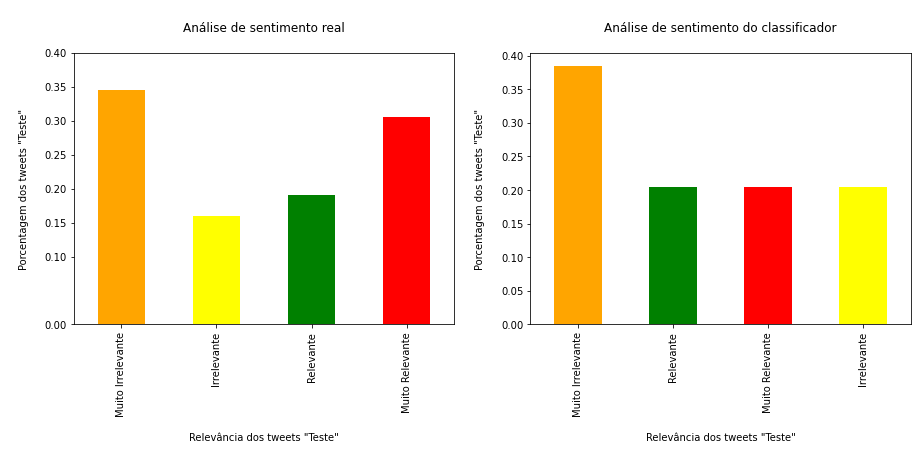

In [1110]:
#comparação

plt.figure(figsize=(15, 5))

dado = test['Classificação'].value_counts(normalize =  True, sort = False)

dadoc = test['Classificador'].value_counts(normalize =  True)


colors = ['orange', 'yellow', 'green', 'red']
colors2 = ['orange', 'green', 'red', 'yellow']

plt.subplot(121)
dado.plot.bar(stacked = True, color=colors) 
plt.xlabel('\nRelevância dos tweets "Teste"\n')
plt.yticks([0,0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])
plt.ylabel('\nPorcentagem dos tweets "Teste"\n')
plt.title('\nAnálise de sentimento real\n')

plt.subplot(122)
dadoc.plot.bar(stacked = True, color=colors2) 
plt.xlabel('\nRelevância dos tweets "Teste"\n')
plt.ylabel('\nPorcentagem dos tweets "Teste"\n')
plt.title('\nAnálise de sentimento do classificador\n')


plt.show()

### Como o Naive-Bayes trabalha com mensagens de dupla negação e sarcasmo?

- O Naive Bayes trabalha com o conteúdo e classificação individual de cada palavra, ou seja, o classificador não leva em consideração a ordem em que essas palavras são posicionadas, portanto não entenderia uma declaração de sarcasmo ou dupla negação.


### Por que devem continuar financiando o projeto?

- A SHEIN deve continuar financiando o projeto pois já analisamos e concluímos uma das dores do consumidor da marca: A ENTREGA DOS PRODUTOS. Um lado muito importante para se avaliar quando há uma análise da empresa é o conceito de Net Promoter Score (NPS) que consiste numa classificação quanti-qualitativa de varia de 0 a 10 de acordo com a fidelidade e feedback de seus clientes. O NPS é importante para recomendações da empresa para outras pessoas do ciclo do usuário e até mesmo se após a primeira compra, os usuários continuam comprando ou não.

### Diferentes cenários de uso para o classificador Naive-Bayes:


- Aplicativos como Outlook, Gmail, Yahoo, poderiam utilizar o nosso classificador a fim de ter uma conclusão e detecção de spams em certas mensagens que o usuário iria receber. 

- Em meio a um cenário pandêmico, eventos como a Fashion Week SP poderiam utilizar o classificador para ter um feedback do sentimento de pessoas que acompanhavam o desfile presencialmente e que agora precisam acompanhá-lo em um formato digital. Seria algo vantajoso para a empresa, pois conseguiriam abordar e solucionar certas necessidades e dores de seus clientes.


### Aprimoramento:


- Escolhemos aprimorar a dinâmica do nosso classificador – sem afetar o conteúdo da conclusão da base de dados – tirando menções de outros usuários do Twitter que não eram o foco do tema “SHEIN”. Isso não afetou a base de dados pois nosso classificador tem o objetivo de colher feedbacks da marca, não necessariamente envolve um usuário que foi marcado no Tweet.


### Por que não podemos alimentar a base de Treinamento aplicando novos tweets e usando o mesmo classificador?


- Não poderíamos implementar novos tweets na base de treinamento pois o nosso classificador já possui um viés sobre certas palavras para gerar uma conclusão se aquela declaração é relevante ou irrelevante. Ou seja, mesmo implementando mais tweets, o Naive-Bayes continuaria cometendo os mesmos erros.

# ITEM 6

In [1115]:
def classifica2 (frase):
    
    p_MI
    p_I
    p_R
    p_MR
    prob_frase_dado_MI= 1
    prob_frase_dado_I= 1
    prob_frase_dado_R= 1
    prob_frase_dado_MR= 1
    total_palavras= 1000
    beta= 1
    
    frase= frase.split(' ')
    for palavra in frase:
        
        #probabilidade da frase ser muito irrelevante
        if palavra in freqabMI:
            prob_frase_dado_MI *= ((freqabMI[palavra]+beta)/(total_palavras+freqabMI.sum()))
                                  
        if palavra not in freqabMI:
             prob_frase_dado_MI *= (beta/(total_palavras+freqabMI.sum()))
        
        #probabilidade da frase ser irrelevante
        if palavra in freqabI:
            prob_frase_dado_I *= ((freqabI[palavra]+beta)/(total_palavras+freqabI.sum()))
        
        if palavra not in freqabI:
            prob_frase_dado_I *= (beta/(total_palavras+freqabI.sum()))
        
        #probabilidade da frase ser relevante
        if palavra in freqabR:
            prob_frase_dado_R *= ((freqabR[palavra]+beta)/(total_palavras+freqabR.sum()))
        
        if palavra not in freqabR:
            prob_frase_dado_R *= (beta/(total_palavras+freqabR.sum()))
        
        #probabilidade da frase ser muito relevante
        if palavra in freqabMR:
            prob_frase_dado_MR *= ((freqabMR[palavra]+beta)/(total_palavras+freqabMR.sum()))
        
        if palavra not in freqabMR:
            prob_frase_dado_MR *= (beta/(total_palavras+freqabMR.sum()))
                                   
    probMI_dado_frase = p_mi*prob_frase_dado_MI
    probI_dado_frase = p_i*prob_frase_dado_I
    probR_dado_frase = p_r*prob_frase_dado_R
    probMR_dado_frase = p_mr*prob_frase_dado_MR
    probabilidades = [probMI_dado_frase, probI_dado_frase, probR_dado_frase, probMR_dado_frase]
    
    if max(probabilidades) == probabilidades[0]: 
        return 'Muito Irrelevante'
    if max(probabilidades) == probabilidades[1]:
        return 'Irrelevante'
    if max(probabilidades) == probabilidades[2]: 
        return 'Relevante'
    if max(probabilidades) == probabilidades[3]:
        return 'Muito Relevante'

In [1116]:
#juntando as duas bases de dados em uma só 
train2 = train.drop(columns = ["Classificador"])
train2.columns = ["Tweets", "Classificação"]


test2 = test.drop(columns = ["Classificador"])
test2.columns = ["Tweets", "Classificação"]

MI_v=[]
I_v = []
R_v = []
MR_v = []

#jutando as dataframes
tudo = test2.append(train2)
tudo = tudo.reset_index(drop=True)

for i in range (100):
    #dividindo em treinamento e teste
    tr = tudo.sample(frac = 0.6)
    te = tudo.drop(te.index)

    #dividindo nas classificações

    #Muito Relevante
    filtroMR = tr["Classificação"]== "Muito Relevante"
    classificadorMR = ' '.join(tr.loc[filtroMR, 'Tweets'])
    classificadorMRlimpo = cleanup(classificadorMR)
    claMRs = str(classificadorMRlimpo)

    #Relevante
    filtroR = tr["Classificação"]== "Relevante"
    classificadorR = ' '.join(tr.loc[filtroR, 'Tweets'])
    classificadorRlimpo = cleanup(classificadorR)
    claRs = str(classificadorRlimpo)

    #Irrelevante
    filtroI = tr["Classificação"]== "Irrelevante"
    classificadorI = ' '.join(tr.loc[filtroI, 'Tweets'])
    classificadorIlimpo = cleanup(classificadorI)
    claIs = str(classificadorIlimpo)

    #Muito Irrelevante
    filtroMI = tr["Classificação"]== "Muito Irrelevante"
    classificadorMI = ' '.join(tr.loc[filtroMI, 'Tweets'])
    classificadorMIlimpo = cleanup(classificadorMI)
    claMIs = str(classificadorMIlimpo)

    #SEPARANDO 
    claMRpronto = t.tokenize(claMRs)
    claRpronto = t.tokenize(claRs)
    claIpronto = t.tokenize(claIs)
    claMIpronto = t.tokenize(claMIs)

    #probabilidades
    t = claMIpronto + claIpronto + claMRpronto + claRpronto
    p_MR=len(claMRpronto)/len(t)
    p_R=len(claRpronto)/len(t)
    p_I=len(claIpronto)/len(t)
    p_MI=len(claMIpronto)/len(t)

    #frequencias relavtivas e absolutas
    seriesMR= pd.Series(claMRpronto)
    freqabMR= seriesMR.value_counts()

    seriesR= pd.Series(claRpronto)
    freqabR= seriesR.value_counts()

    seriesI= pd.Series(claIpronto)
    freqabI= seriesI.value_counts()

    seriesMI = pd.Series(claMIpronto)
    freqabMI= seriesMI.value_counts()
    
    te['Tweets'] = te['Tweets'].astype('str')
    te['Tweets'] = te['Tweets'].apply(cleanup)
    te['Classificador'] = te['Tweets'].apply(classifica2)
    tpi = pd.crosstab(te['Classificação'], te['Classificador'], normalize='index')
    
    MI_v.append(tpi.iloc[0,1])
    I_v.append(tpi.iloc[1,0])
    R_v.append(tpi.iloc[2,3])
    MR_v.append(tpi.iloc[3,2])


AttributeError: 'list' object has no attribute 'tokenize'

In [1117]:
type(claMRs)

str

___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis -
* Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis -
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação -
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B) -
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)


___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**